In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'CS229/Project/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/CS229/Project


In [ ]:
# Baseline packages
import numpy as np
import pandas as pd
import os

# Custom packages
from util import load_dataset
from util import place_bets
from util import evaluate_bets
from custom_loss import custom_loss

# Specific packages
from sklearn import tree
from sklearn import ensemble
import graphviz 


# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

Loading data

In [ ]:
# Training
x_train = load_dataset("Load_Data/x_train.csv", intercept=True)
y_train = load_dataset("Load_Data/y_train.csv").to_numpy().flatten()

# Validation
x_val = load_dataset("Load_Data/x_val.csv", intercept=True)
y_val = load_dataset("Load_Data/y_val.csv").to_numpy().flatten()

# Test
x_test = load_dataset("Load_Data/x_test.csv", intercept=True)
y_test = load_dataset("Load_Data/y_test.csv").to_numpy().flatten()

In [ ]:
x_train

,Intercept,Time_left,Spread,Odds_Home,Odds_Away,Initial_odds_home,Initial_odds_away,Q_2.0,Q_3.0,Q_4.0,Team_Home_BKN Nets,Team_Home_Boston Celtics,Team_Home_CHA Hornets,Team_Home_Chicago Bulls,Team_Home_Cleveland Cavaliers,Team_Home_DAL Mavericks,Team_Home_Denver Nuggets,Team_Home_Detroit Pistons,Team_Home_Golden State Warriors,Team_Home_Houston Rockets,Team_Home_Indiana Pacers,Team_Home_LA Lakers,Team_Home_Los Angeles Clippers,Team_Home_MIA Heat,Team_Home_Memphis Grizzlies,Team_Home_Milwaukee Bucks,Team_Home_Minnesota Timberwolves,Team_Home_New Orleans Pelicans,Team_Home_New York Knicks,Team_Home_Oklahoma City Thunder,Team_Home_Orlando Magic,Team_Home_Philadelphia 76ers,Team_Home_Phoenix Suns,Team_Home_Portland Trail Blazers,Team_Home_Sacramento Kings,Team_Home_San Antonio Spurs,Team_Home_Toronto Raptors,Team_Home_Utah Jazz,Team_Home_Washington Wizards,Team_Away_BKN Nets,Team_Away_Boston Celtics,Team_Away_CHA Hornets,Team_Away_Chicago Bulls,Team_Away_Cleveland Cavaliers,Team_Away_DAL Mavericks,Team_Away_Denver Nuggets,Team_Away_Detroit Pistons,Team_Away_Golden State Warriors,Team_Away_Houston Rockets,Team_Away_Indiana Pacers,Team_Away_LA Lakers,Team_Away_Los Angeles Clippers,Team_Away_MIA Heat,Team_Away_Memphis Grizzlies,Team_Away_Milwaukee Bucks,Team_Away_Minnesota Timberwolves,Team_Away_New Orleans Pelicans,Team_Away_New York Knicks,Team_Away_Oklahoma City Thunder,Team_Away_Orlando Magic,Team_Away_Philadelphia 76ers,Team_Away_Phoenix Suns,Team_Away_Portland Trail Blazers,Team_Away_Sacramento Kings,Team_Away_San Antonio Spurs,Team_Away_Toronto Raptors,Team_Away_Utah Jazz,Team_Away_Washington Wizards
0,1,48.000000,0,1.95,1.860,1.95,1.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,48.000000,0,2.30,1.660,1.95,1.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,48.000000,0,2.25,1.680,1.95,1.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,48.000000,0,2.30,1.660,1.95,1.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,48.000000,0,2.35,1.640,1.95,1.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299741,1,0.716667,-7,17.50,1.012,4.20,1.25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
299742,1,0.716667,-7,15.50,1.028,4.20,1.25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
299743,1,0.716667,-7,17.50,1.012,4.20,1.25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
299744,1,0.550000,-6,19.00,1.006,4.20,1.25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Removing team from features to see if model is able to generalize better without teams
x_train = x_train[['Intercept', 'Time_left', 'Spread', 'Odds_Home', 'Odds_Away', 'Initial_odds_home', 'Initial_odds_away', 'Q_2.0', 'Q_3.0', 'Q_4.0']]
x_val = x_val[['Intercept', 'Time_left', 'Spread', 'Odds_Home', 'Odds_Away', 'Initial_odds_home', 'Initial_odds_away', 'Q_2.0', 'Q_3.0', 'Q_4.0']]
x_test = x_test[['Intercept', 'Time_left', 'Spread', 'Odds_Home', 'Odds_Away', 'Initial_odds_home', 'Initial_odds_away', 'Q_2.0', 'Q_3.0', 'Q_4.0']]

Lets fit a tree

In [ ]:
# Obtaining an array with all feature (column) names
feature_names = x_train.columns.values
class_names = ['Win_away', 'Win_home']

In [ ]:
# Lets train the model, varying the depth of the tree to obtain the best model
depth_values = [3, 4, 5]
train_acc = []
val_acc = []
model_list = []

for depth in depth_values:
  # Fitting model
  model = tree.DecisionTreeClassifier(max_depth=depth, min_samples_split=20)
  model = model.fit(x_train, y_train)
  
  # Predicting on train and validation sets
  y_train_hat = model.predict(x_train)
  y_val_hat = model.predict(x_val)

  # Computing model accuracy
  score_train = np.mean(y_train_hat == y_train)
  score_val = np.mean(y_val_hat == y_val)

  # Adding to lists
  train_acc.append(score_train)
  val_acc.append(score_val)
  model_list.append(model)

  # Printing iteration
  print(f"Done for max depth {depth}")


Done for max depth 3
Done for max depth 4
Done for max depth 5


In [ ]:
print(train_acc)
print(val_acc)

[0.7375691782731779, 0.74226219451678, 0.7524611160210027]
[0.7740272519198271, 0.7770647500481294, 0.7620697768936234]


In [ ]:
maxpos = val_acc.index(max(val_acc))
best_model = model_list[maxpos]
print(f"Best model has depth {depth_values[maxpos]}")

print(f"Achieves accuracy of {100*train_acc[maxpos]:.2f}% on the training set")
print(f"Achieves accuracy of {100*val_acc[maxpos]:.2f}% on the validation set")

Best model has depth 4
Achieves accuracy of 74.23% on the training set
Achieves accuracy of 77.71% on the validation set


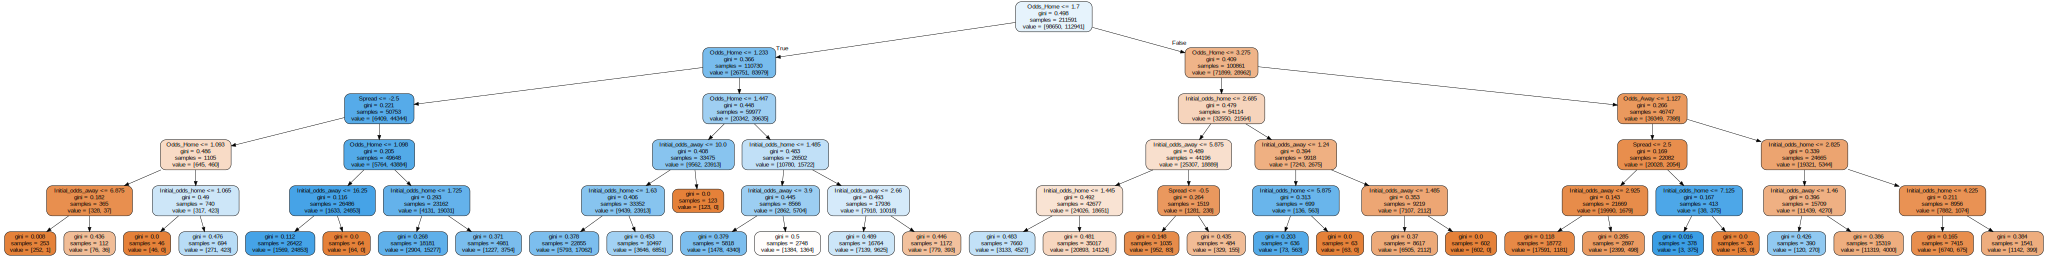

In [ ]:
# Plotting our decision tree model
dot_data = tree.export_graphviz(best_model, out_file=None, feature_names=feature_names, label='all', rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

Looking at profit from this model

In [ ]:
# Computing predictions
y_train_hat = best_model.predict(x_train)
y_val_hat = best_model.predict(x_val)

# Computing profit in training and validation examples
profit_train = custom_loss(y_train, y_train_hat, x_train['Odds_Home'], x_train['Odds_Away'])
profit_val = custom_loss(y_val, y_val_hat, x_val['Odds_Home'], x_val['Odds_Away'])

In [ ]:
print(f"Model generates ${profit_val:.2f} in profit on validation sample. In the training sample, model generates ${profit_train:.2f}")
print(f"Betting on the model represents a {100* profit_val / x_val.shape[0]:.2f}% return on an investment of ${x_val.shape[0]}")

Model generates $574.94 in profit on validation sample. In the training sample, model generates $4120.72
Betting on the model represents a 1.23% return on an investment of $46749


## Allowing model options of Bet Home, Bet Away, No Bet

In [ ]:
# First, obtain probability of {Home_loss, Home_win} from the decision tree model
best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Obtaining profit in training sample
prob_train = best_model.predict_proba(x_train)
odds_home_train = x_train['Odds_Home']
odds_away_train = x_train['Odds_Away']
bets_train = place_bets(prob_train, odds_home_train, odds_away_train)
profit_train_strat = evaluate_bets(bets_train, odds_home_train, odds_away_train, y_train)

In [ ]:
# Lets do the same for the validation set
prob_val = best_model.predict_proba(x_val)
odds_home_val = x_val['Odds_Home']
odds_away_val = x_val['Odds_Away']
bets_val = place_bets(prob_val, odds_home_val, odds_away_val)
profit_val_strat = evaluate_bets(bets_val, odds_home_val, odds_away_val, y_val)

In [ ]:
bets_val[:,2].sum()

13199.0

In [ ]:
bets_val.shape

(46749, 3)

In [ ]:
print(f"The model achieves a profit of ${profit_train_strat.sum():.2f} in the training sample")
print(f"The model achieves a profit of ${profit_val_strat.sum():.2f} in the validation sample")

The model achieves a profit of $10790.57 in the training sample
The model achieves a profit of $-3442.31 in the validation sample


In [ ]:
bets_val

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

# Random Forest

In [ ]:
# Lets train the model, varying the depth of the tree to obtain the best model
depth_values = [3, 4, 5]
train_acc = []
val_acc = []
model_list = []

for depth in depth_values:
  # Fitting model
  rf_model = ensemble.RandomForestClassifier(n_estimators=100, max_depth=depth, min_samples_split=20)
  forest = rf_model.fit(x_train, y_train)
  
  # Predicting on train and validation sets
  y_train_hat = forest.predict(x_train)
  y_val_hat = forest.predict(x_val)

  # Computing model accuracy
  score_train = np.mean(y_train_hat == y_train)
  score_val = np.mean(y_val_hat == y_val)

  # Adding to lists
  train_acc.append(score_train)
  val_acc.append(score_val)
  model_list.append(model)

  # Printing iteration
  print(f"Done for max depth {depth}")


Done for max depth 3
Done for max depth 4
Done for max depth 5


In [ ]:
print(train_acc)
print(val_acc)

[0.7374699301955188, 0.7402157936774248, 0.7521113846997273]
[0.7764016342595563, 0.776808060065456, 0.778134291642602]


In [ ]:
maxpos = val_acc.index(max(val_acc))
best_model = model_list[maxpos]
print(f"Best model has depth {depth_values[maxpos]}")
print(f"Achieves accuracy of {100*train_acc[maxpos]:.2f}% on the training set")
print(f"Achieves accuracy of {100*val_acc[maxpos]:.2f}% on the validation set")

Best model has depth 5
Achieves accuracy of 75.21% on the training set
Achieves accuracy of 77.81% on the validation set


In [ ]:
# Computing predictions
y_train_hat = best_model.predict(x_train)
y_val_hat = best_model.predict(x_val)

# Computing profit in training and validation examples
profit_train = custom_loss(y_train, y_train_hat, x_train['Odds_Home'], x_train['Odds_Away'])
profit_val = custom_loss(y_val, y_val_hat, x_val['Odds_Home'], x_val['Odds_Away'])

In [ ]:
print(f"Model generates ${profit_val:.2f} in profit on validation sample. In the training sample, model generates ${profit_train:.2f}")
print(f"Betting on the model represents a {100* profit_val / x_val.shape[0]:.2f}% return on an investment of ${x_val.shape[0]}")

Model generates $-277.50 in profit on validation sample. In the training sample, model generates $14005.71
Betting on the model represents a -0.59% return on an investment of $46749


## Allowing No Bet

In [ ]:
# Obtaining profit in training sample
prob_train = best_model.predict_proba(x_train)
odds_home_train = x_train['Odds_Home']
odds_away_train = x_train['Odds_Away']
bets_train = place_bets(prob_train, odds_home_train, odds_away_train)
profit_train_strat = evaluate_bets(bets_train, odds_home_train, odds_away_train, y_train)

In [ ]:
# Lets do the same for the validation set
prob_val = best_model.predict_proba(x_val)
odds_home_val = x_val['Odds_Home']
odds_away_val = x_val['Odds_Away']
bets_val = place_bets(prob_val, odds_home_val, odds_away_val)
profit_val_strat = evaluate_bets(bets_val, odds_home_val, odds_away_val, y_val)

In [ ]:
print(f"The model achieves a profit of ${profit_train_strat.sum():.2f} in the training sample")
print(f"The model achieves a profit of ${profit_val_strat.sum():.2f} in the validation sample")

The model achieves a profit of $21071.99 in the training sample
The model achieves a profit of $-2456.28 in the validation sample
